In [803]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets

In [804]:
pd.set_option('display.max_columns',35)

In [805]:
import warnings
plt.rcParams.update({'figure.max_open_warning': 0})
warnings.simplefilter(action="ignore", category=FutureWarning)

In [806]:
data = pd.read_csv('Desktop/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# I-EDA 

## 1-General Analysis

In [807]:
df = data.copy()

In [808]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


#### Target variable : Attrition 

In [809]:
# rows & columns
df.shape

(1470, 35)

In [810]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [811]:
df1.duplicated().value_counts()

False    770
dtype: int64

##### => We have 26 Quantitative Variables and 9 Qualitative Variables ; we don't have duplicated values

### Analysis of missing values

In [812]:
df.isnull().sum().sum()

0

In [813]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Target analysis

In [814]:
df['Attrition'].value_counts(normalize = True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

#### => Attrition rate : 16,1%

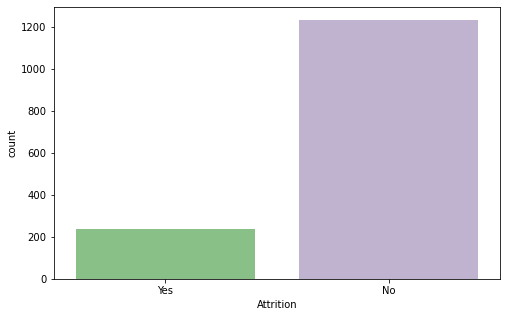

In [815]:
plt.figure(figsize = (8,5))
sns.countplot(x = 'Attrition', data = df, palette = 'Accent')
plt.show()

### Qualitative Variables

In [816]:
for col in df.select_dtypes('object') : 
    print(f'{col :-<50} {df[col].unique()}')

Attrition----------------------------------------- ['Yes' 'No']
BusinessTravel------------------------------------ ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department---------------------------------------- ['Sales' 'Research & Development' 'Human Resources']
EducationField------------------------------------ ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender-------------------------------------------- ['Female' 'Male']
JobRole------------------------------------------- ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus------------------------------------- ['Single' 'Married' 'Divorced']
Over18-------------------------------------------- ['Y']
OverTime------------------------------------------ ['Yes' 'No']


##### => We have binary variables : Gender, OverTime, Attrition ; ordinal variable : BusinessTravel ; nominal variables : Department, JobRole, EducationField, MaritalStatus.

### Quantitative variables 

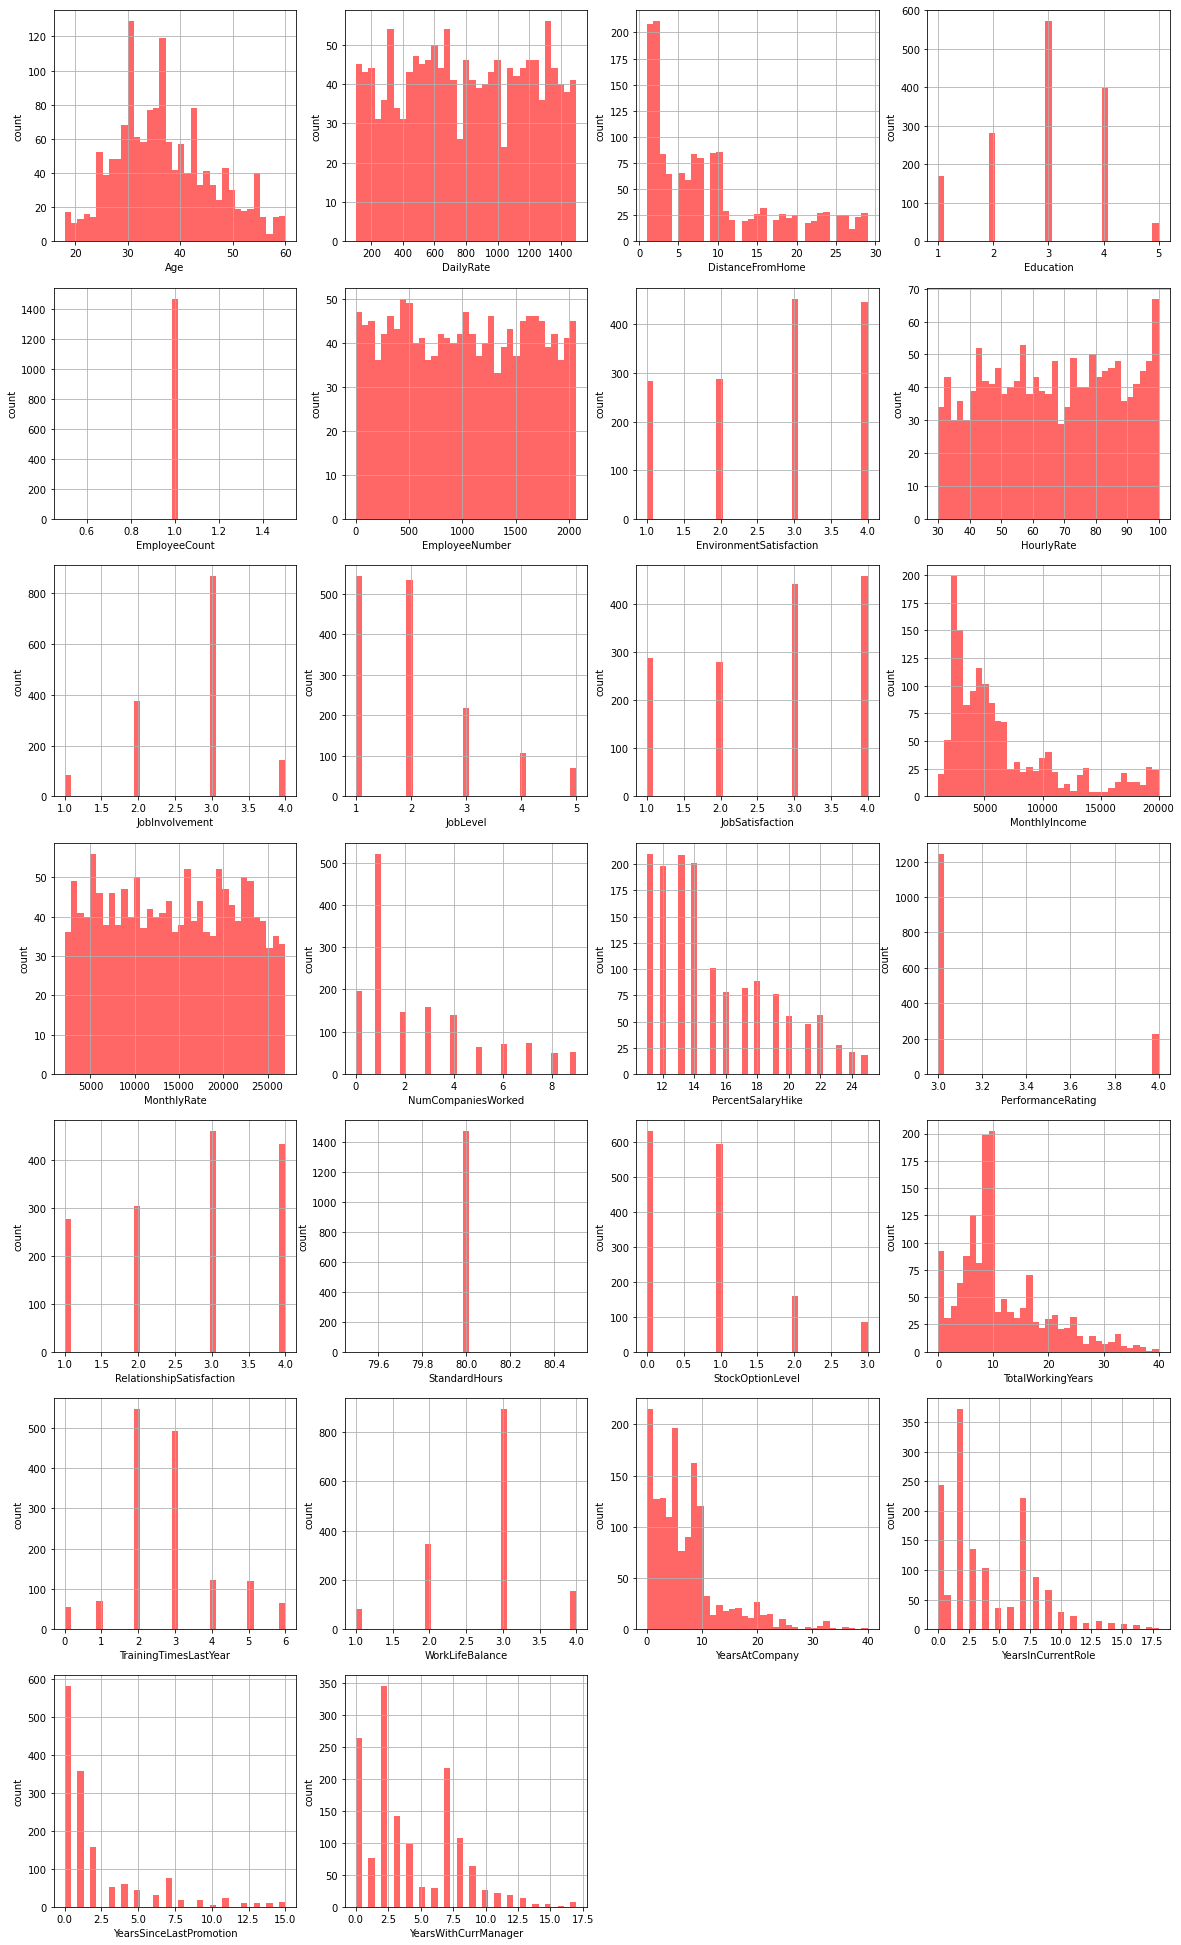

In [817]:
plt.figure(figsize=(20, 40))

for i,col in enumerate(df.select_dtypes('int64'),1) :
    plt.subplot(8, 4, i)
    df[col].hist(bins=35,alpha=0.6,label=col,color='red')
    plt.xlabel(col)
    plt.ylabel('count')

##### => The data is not normalized ; all the histograms have a skewed shape  ; some histograms have gaps ; we have here the 4 types of modality : unimodal, uniform, bimodal and multimodal. We can see also some variables with unique value count : EmployeeCount and StandardHours that might be deleted in the pre processing 

In [818]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def get_iqr_text(df_in, col_name):
    median, q1, q3, iqr, minimum, maximum = get_iqr_values(df_in, col_name)
    text = f"median={median:.2f}, q1={q1:.2f}, q3={q3:.2f}, iqr={iqr:.2f}, minimum={minimum:.2f}, maximum={maximum:.2f}"
    return text

def remove_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

def count_outliers(df_in, col_name):
    _, _, _, _, minimum, maximum = get_iqr_values(df_in, col_name)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def box_and_whisker(df_in, col_name):
    title = get_iqr_text(df_in, col_name)
    sns.boxplot(df_in[col_name])
    plt.title(title)
    plt.show()

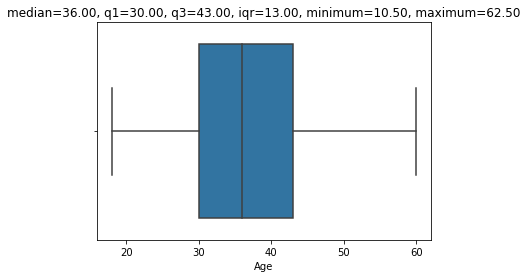

1470
Age  has 0 outliers


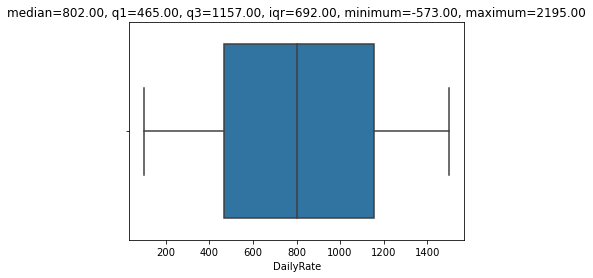

1470
DailyRate  has 0 outliers


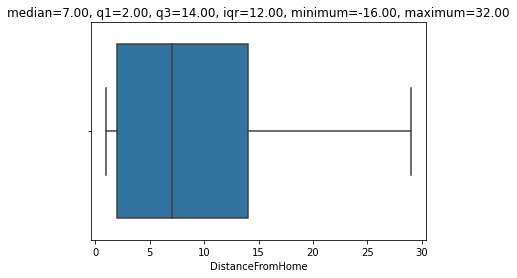

1470
DistanceFromHome  has 0 outliers


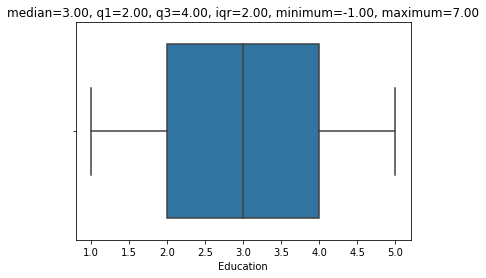

1470
Education  has 0 outliers


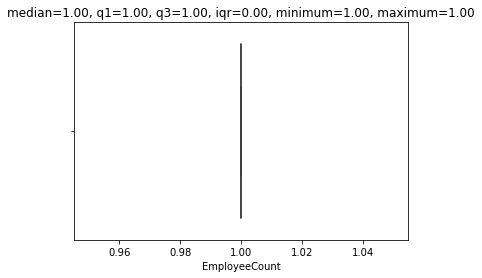

1470
EmployeeCount  has 1470 outliers


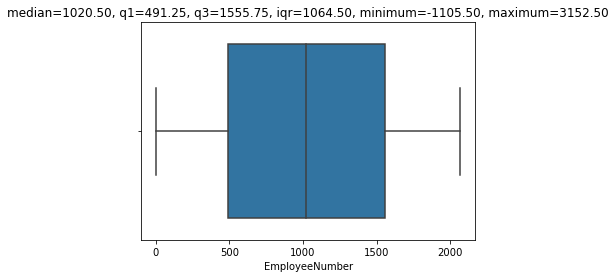

1470
EmployeeNumber  has 0 outliers


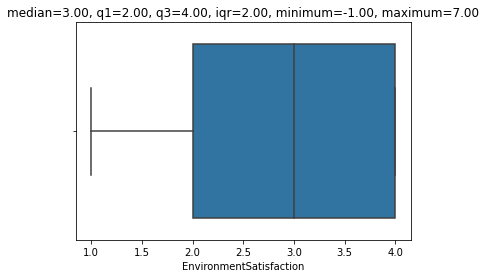

1470
EnvironmentSatisfaction  has 0 outliers


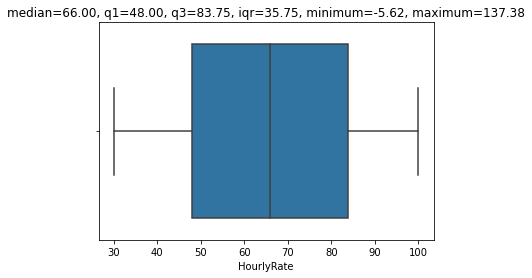

1470
HourlyRate  has 0 outliers


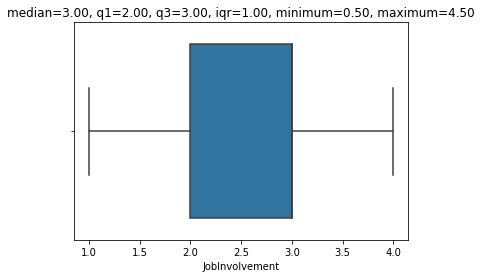

1470
JobInvolvement  has 0 outliers


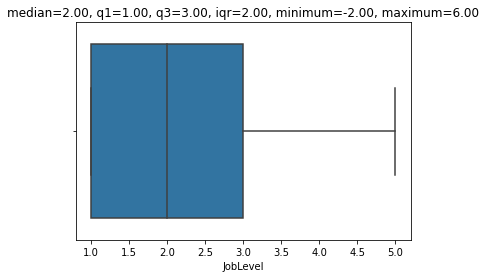

1470
JobLevel  has 0 outliers


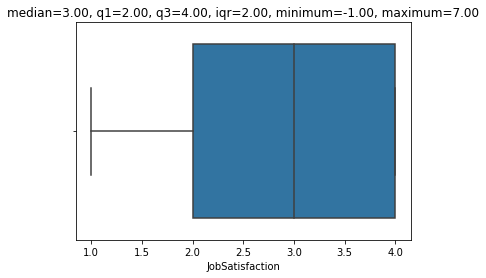

1470
JobSatisfaction  has 0 outliers


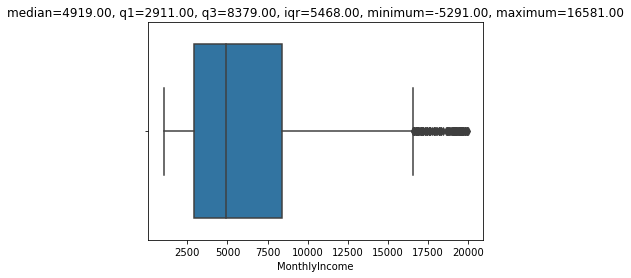

1470
MonthlyIncome  has 114 outliers


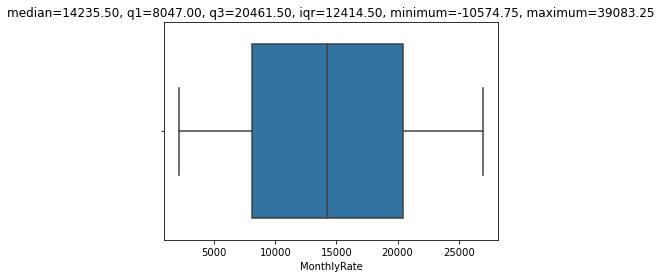

1470
MonthlyRate  has 0 outliers


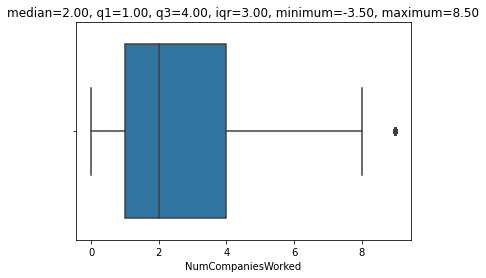

1470
NumCompaniesWorked  has 52 outliers


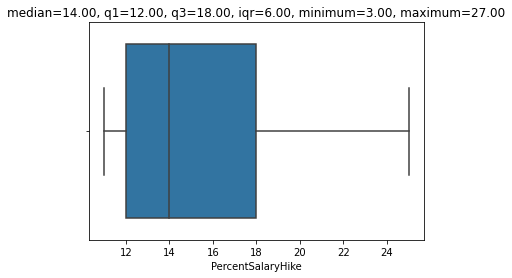

1470
PercentSalaryHike  has 0 outliers


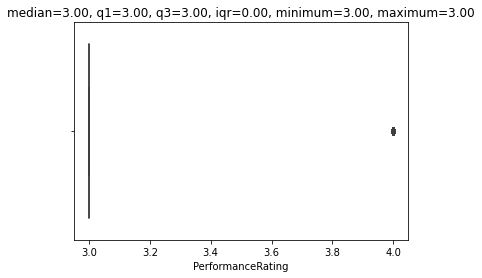

1470
PerformanceRating  has 1470 outliers


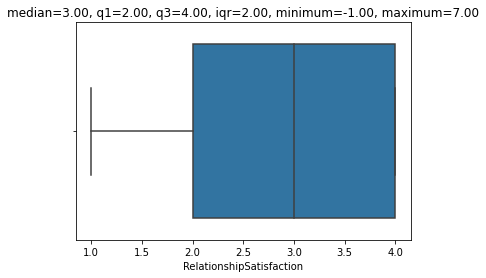

1470
RelationshipSatisfaction  has 0 outliers


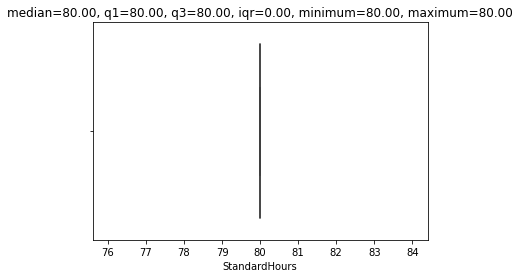

1470
StandardHours  has 1470 outliers


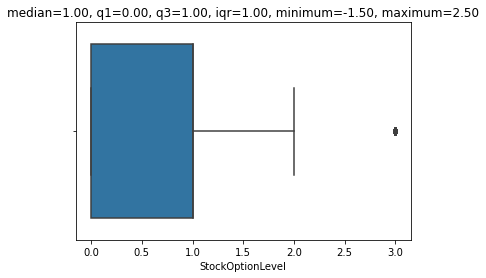

1470
StockOptionLevel  has 85 outliers


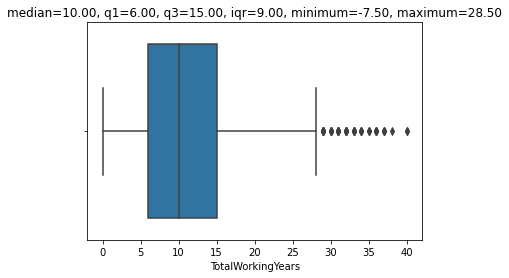

1470
TotalWorkingYears  has 63 outliers


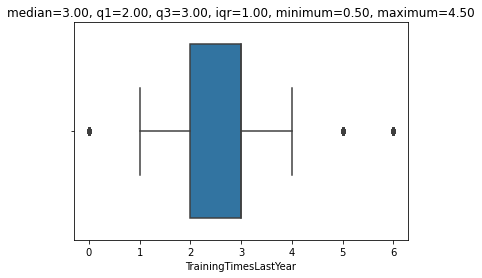

1470
TrainingTimesLastYear  has 238 outliers


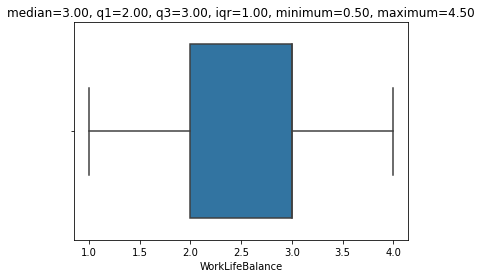

1470
WorkLifeBalance  has 0 outliers


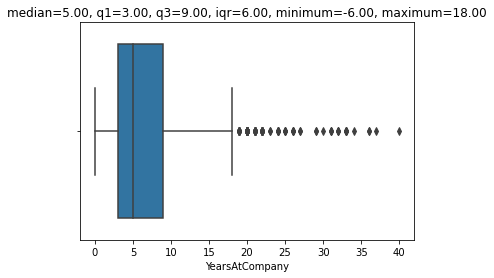

1470
YearsAtCompany  has 117 outliers


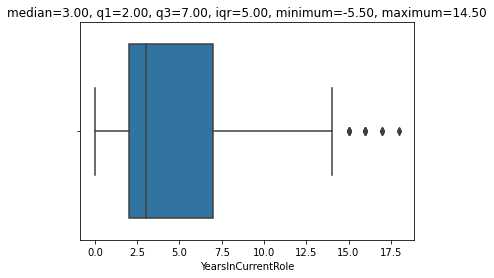

1470
YearsInCurrentRole  has 21 outliers


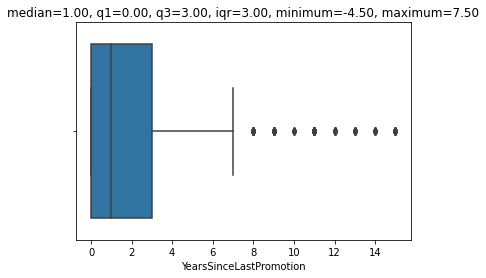

1470
YearsSinceLastPromotion  has 107 outliers


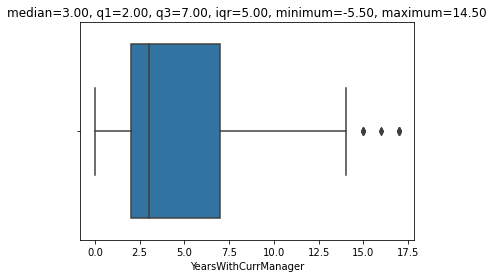

1470
YearsWithCurrManager  has 14 outliers


In [819]:
for col in df.select_dtypes('int64').columns:
    box_and_whisker(df, col)
    print(df[col].count())
    _, _, _, _, minimum_Col_before, maximum_Col_before = get_iqr_values(df, col)
    print(col , f" has {count_outliers(df, col)} outliers")

## 2-Relationship between target variable and other variables 

### Demographic features 

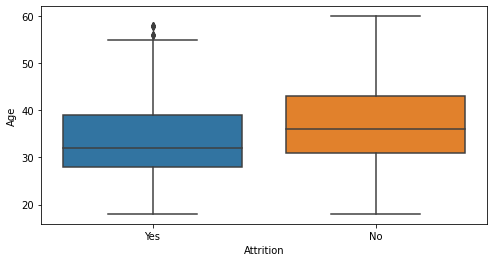

In [820]:
plt.figure(figsize = (8, 4))
sns.boxplot(x = 'Attrition', y = 'Age', data = df)
plt.show()

##### => People who left have an average age of 34 vs 37 for those that stay 

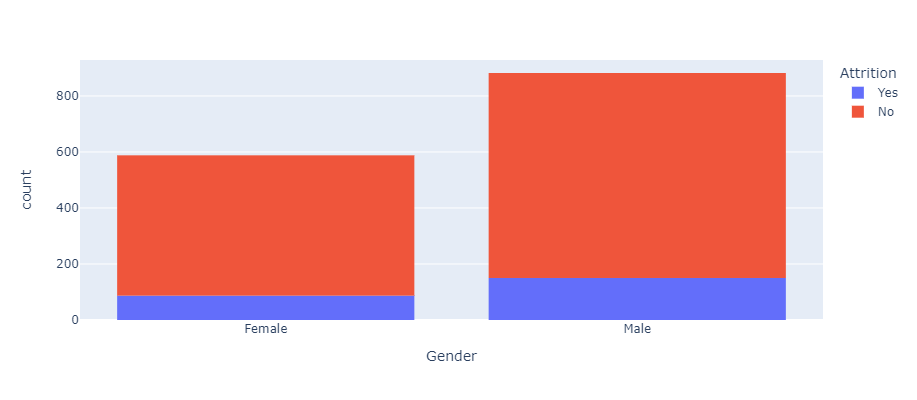

In [821]:
hist = px.histogram(df, x = "Gender", color = "Attrition", width = 400, height = 400)
hist.show()

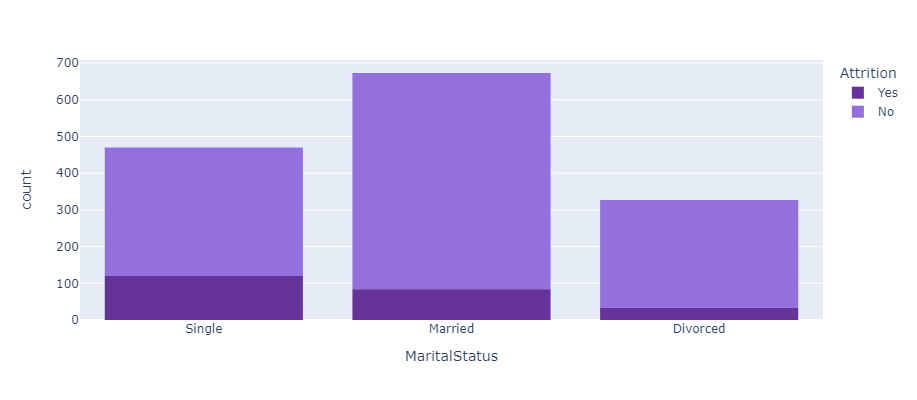

In [822]:
hist = px.histogram(df, x = "MaritalStatus", color = "Attrition", color_discrete_map = { "Yes": "RebeccaPurple", "No": "MediumPurple"}, width = 400, height = 400)
hist.show()

##### => Single people are more likely to quit their job more than the others 

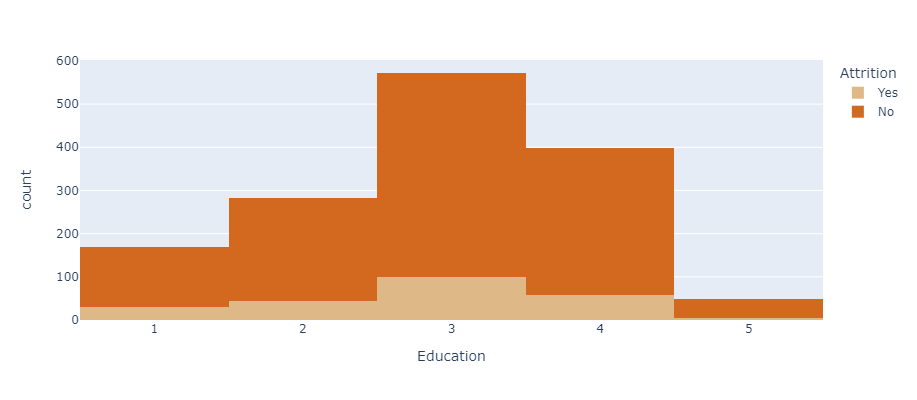

In [823]:
hist = px.histogram(df, x = "Education", color = "Attrition", color_discrete_map = { "Yes": "BurlyWood", "No": "Chocolate"}, width = 400, height = 400)
hist.show()

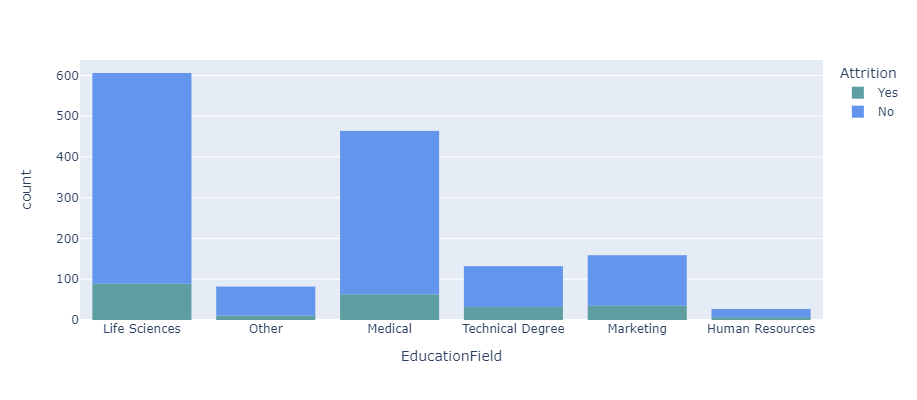

In [824]:
hist = px.histogram(df, x = "EducationField", color = "Attrition", color_discrete_map = { "Yes": "CadetBlue", "No": "CornFlowerBlue"}, width = 400, height = 400)
hist.show()

##### => People with bachelor degree and life sciences have a relatively higher turnover rate 

### Work features

Text(0, 0.5, 'Years')

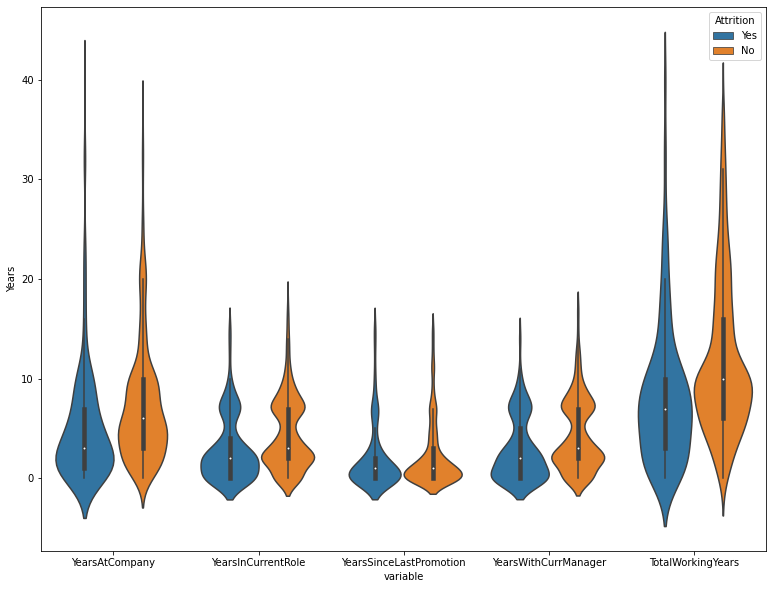

In [825]:
plt.figure(figsize=(13,10))
df_tmp = df[list(df.iloc[:,31:35].columns) + ['Attrition','TotalWorkingYears']]
sns.violinplot(x="variable", y="value", hue='Attrition', data=pd.melt(df_tmp,'Attrition'))
plt.ylabel('Years')

##### => People who have more years at the company tend to stay ; Median of the YearsSinceLastpromotion does not looks like separated so it does not gives good information for classification But median of the others variables looks like separated so they can be good for classification .

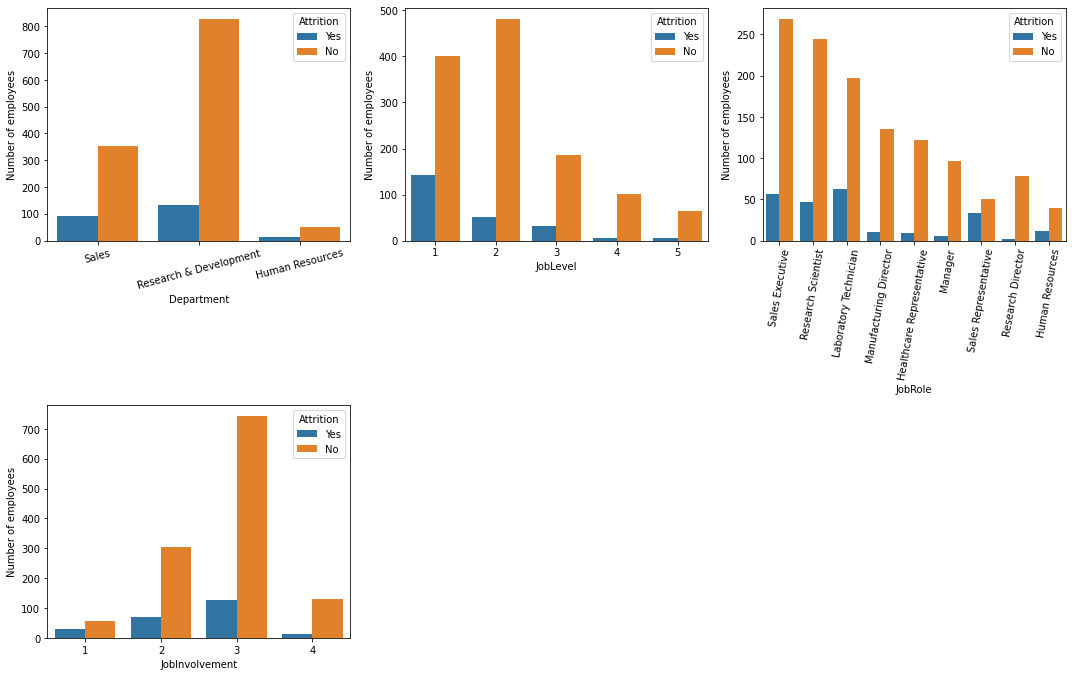

In [826]:
row = 3
col = 3
fig = plt.figure(figsize=(15,15))
ax = plt.subplot2grid((row,col),(1,0), rowspan=1, colspan=1)
ax = sns.countplot(data=df,x='Department',hue='Attrition', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(),rotation=15)
ax.set_ylabel('Number of employees')
ax = plt.subplot2grid((row,col),(1,1), rowspan=1, colspan=1)
ax = sns.countplot(data=df,x='JobLevel',hue='Attrition', ax=ax)
ax.set_ylabel('Number of employees')
ax = plt.subplot2grid((row,col),(1,2), rowspan=1, colspan=1)
ax = sns.countplot(data=df,x='JobRole',hue='Attrition', ax=ax )
ax.set_ylabel('Number of employees')
ax.set_xticklabels(ax.get_xticklabels(),rotation=80)
ax = plt.subplot2grid((row,col),(2,0), rowspan=1, colspan=1)
ax = sns.countplot(data=df,x='JobInvolvement',hue='Attrition', ax=ax )
ax.set_ylabel('Number of employees')
plt.tight_layout()

##### => The lower job levels the higher turnovers ; Research & Developement has the most number of employees who left the Company ; Sales Executive and laboratory Technician are the jobRole with the highest turnover : Employee who are more involved are those who stay 

### Remuneration features

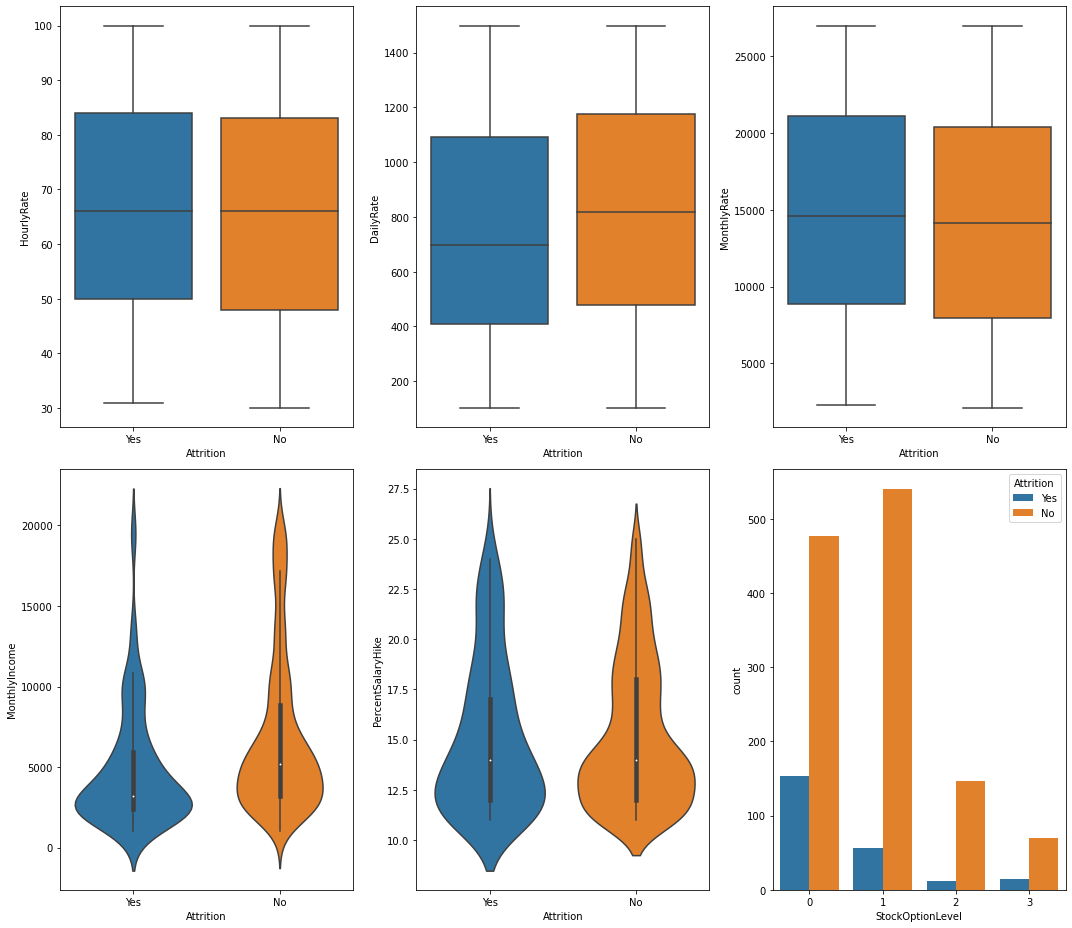

In [827]:
row = 2
col = 3
fig = plt.figure(figsize=(15,13))
ax = plt.subplot2grid((row,col),(0,0), rowspan=1, colspan=1)
ax = sns.boxplot(x='Attrition',data=df, y='HourlyRate', ax=ax)
ax = plt.subplot2grid((row,col),(0,1), rowspan=1, colspan=1)
ax = sns.boxplot(x ='Attrition', y='DailyRate',data=df, ax=ax)
ax = plt.subplot2grid((row,col),(0,2), rowspan=1, colspan=1)
ax = sns.boxplot(x ='Attrition', y='MonthlyRate', data = df, ax=ax )
ax = plt.subplot2grid((row,col),(1,0), rowspan=1, colspan=1)
ax = sns.violinplot(x='Attrition', y='MonthlyIncome',data = df, ax=ax)
ax = plt.subplot2grid((row,col),(1,1),rowspan=1, colspan=1)
ax = sns.violinplot(x='Attrition', y='PercentSalaryHike',data = df, ax=ax)
ax = plt.subplot2grid((row,col),(1,2), rowspan=1, colspan=1)
ax = sns.countplot(x='StockOptionLevel', data=df , hue='Attrition', ax=ax)
plt.tight_layout()

##### => The lowest DailyRate and MonthlyIncome the most turnover ; Employees with lowest stockOption leave the most 

### Satistfaction features

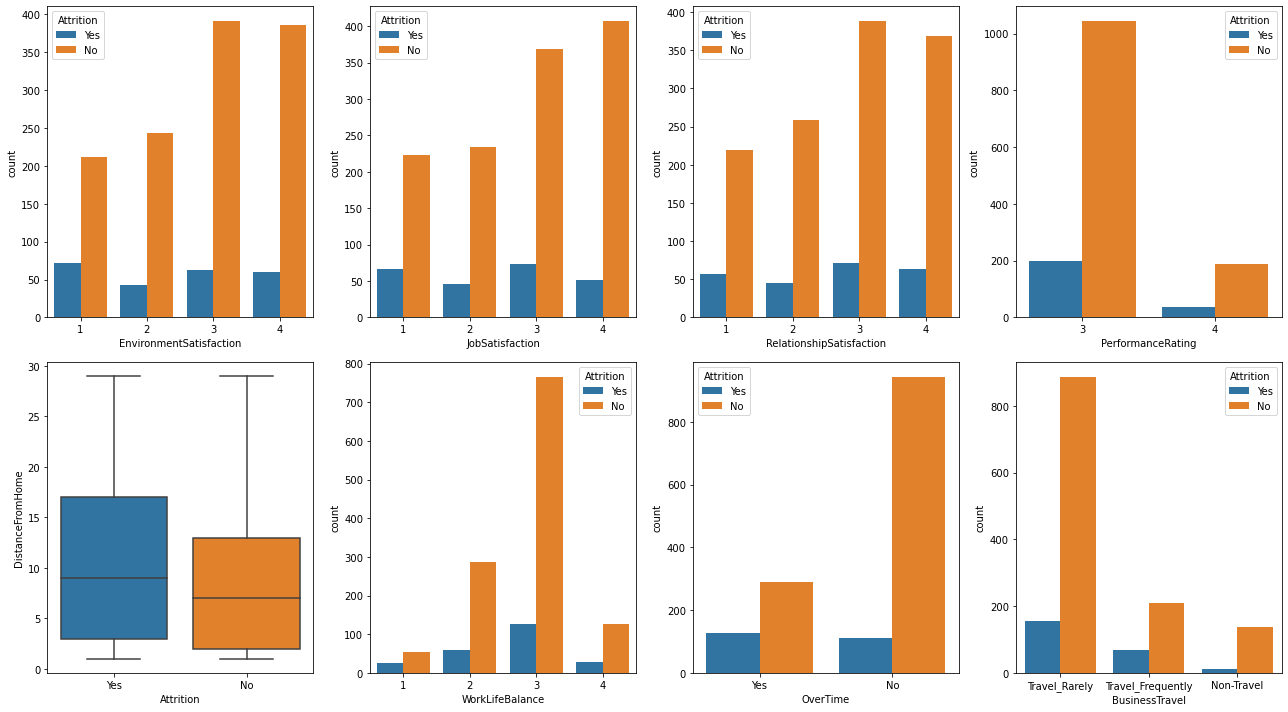

In [828]:
row = 2
col = 4
fig = plt.figure(figsize=(18,10))
ax = plt.subplot2grid((row,col),(0,0), rowspan=1, colspan=1)
ax = sns.countplot(x='EnvironmentSatisfaction', data=df , hue='Attrition', ax=ax)
ax = plt.subplot2grid((row,col),(0,1), rowspan=1, colspan=1)
ax = sns.countplot(x='JobSatisfaction', data=df , hue='Attrition', ax=ax)
ax = plt.subplot2grid((row,col),(0,2), rowspan=1, colspan=1)
ax = sns.countplot(x='RelationshipSatisfaction', data=df , hue='Attrition', ax=ax)
ax = plt.subplot2grid((row,col),(0,3), rowspan=1, colspan=1)
ax = sns.countplot(x='PerformanceRating', data=df , hue='Attrition', ax=ax)
ax = plt.subplot2grid((row,col),(1,0),rowspan=1, colspan=1)
ax = sns.boxplot(x ='Attrition', y='DistanceFromHome', data = df, ax=ax )
ax = plt.subplot2grid((row,col),(1,1), rowspan=1, colspan=1)
ax = sns.countplot(x='WorkLifeBalance', data=df , hue='Attrition', ax=ax)
ax = plt.subplot2grid((row,col),(1,2), rowspan=1, colspan=1)
ax = sns.countplot(x='OverTime', data=df , hue='Attrition', ax=ax)
ax = plt.subplot2grid((row,col),(1,3), rowspan=1, colspan=1)
ax = sns.countplot(x='BusinessTravel', data=df , hue='Attrition', ax=ax)
plt.tight_layout()

##### => Employees who have a low environmentSatisfaction , high jobSatisfaction and high relationshipSatisfaction are most likely to quit the company ; People who are far from the work place and work after time tend to left the job ; Even if employees have a better workLifeBalance they quit the company; The less employee travel the more they left.

## 3-Statistical Analysis

In [829]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


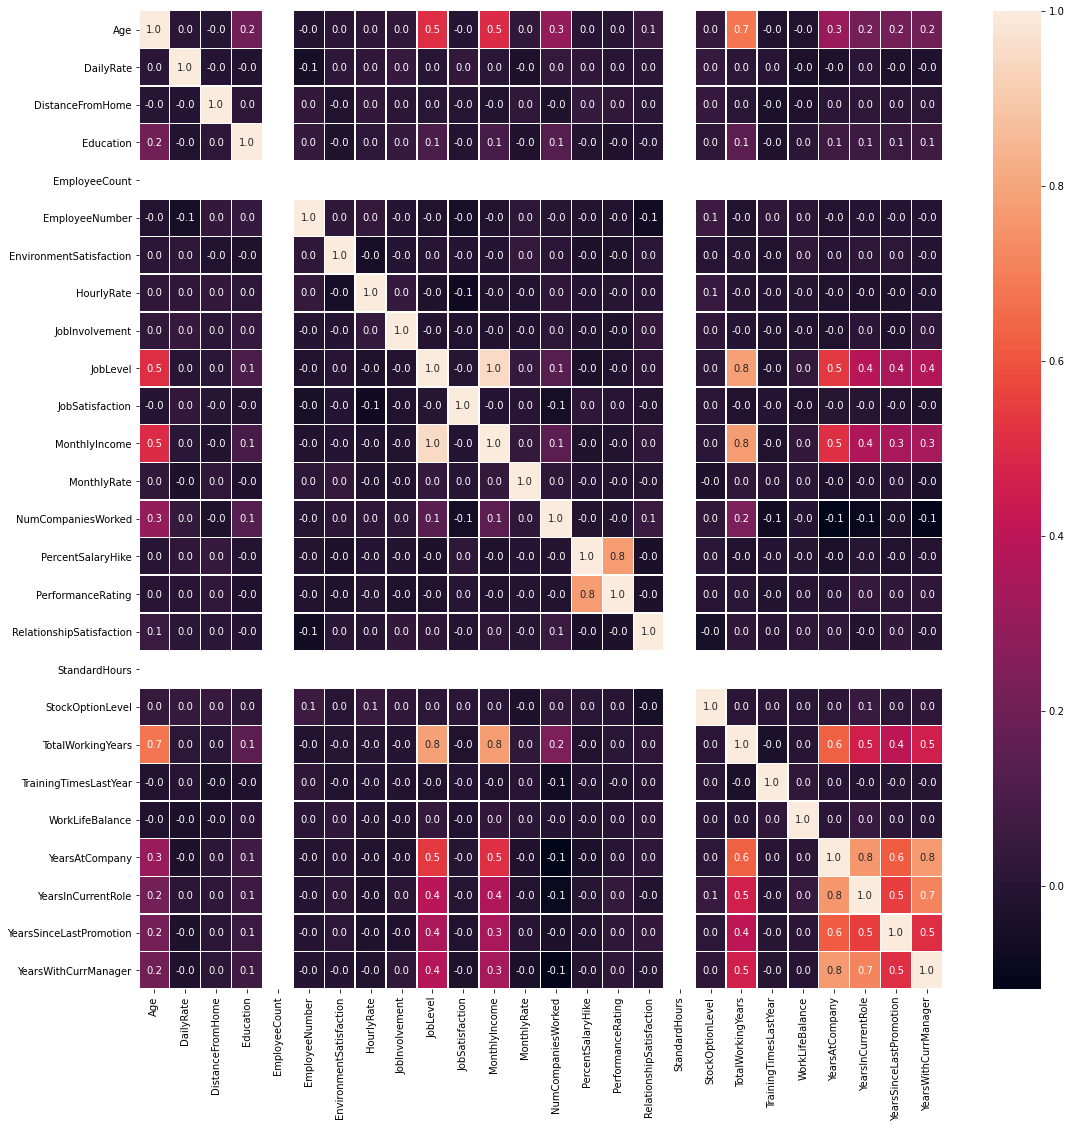

In [830]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True, linewidths=.5, fmt= '.1f')
plt.show()

##### => We notice that the correlation between the most of work features and the remuneration features slighty high.Also the correlation between the remuneration features tend to be high.

## II-Pre_Processing 

In [831]:
df1 = data.copy()

In [832]:
df1.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18'],axis=1, inplace=True)

In [833]:
df1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


### 1-TrainTest - Cleaning - Encoding

In [868]:
from sklearn.model_selection import train_test_split, learning_curve,RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import Ridge,LogisticRegression
from lightgbm import LGBMClassifier

rows before removing: 1470
rows after removing: 1470


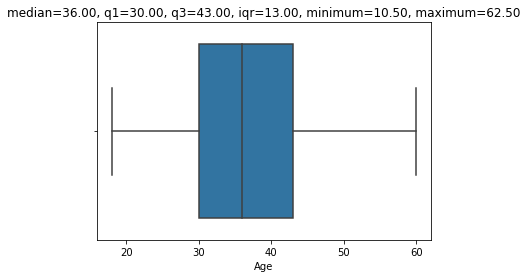

rows before removing: 1470
rows after removing: 1470


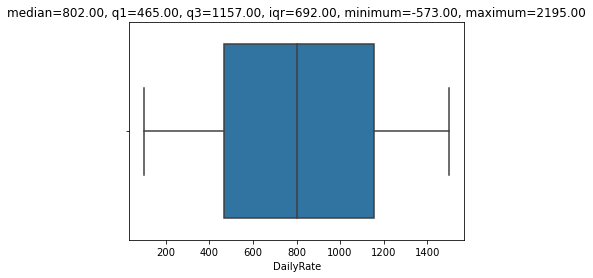

rows before removing: 1470
rows after removing: 1470


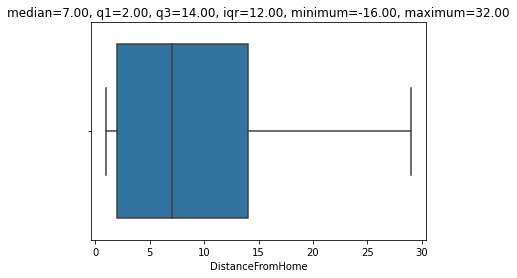

rows before removing: 1470
rows after removing: 1470


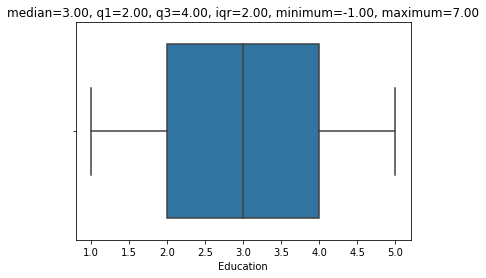

rows before removing: 1470
rows after removing: 1470


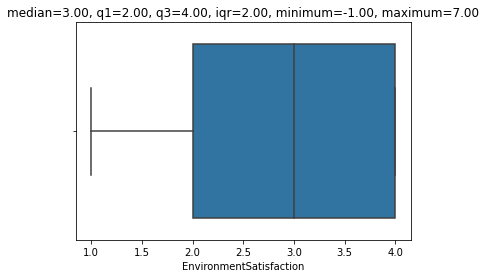

rows before removing: 1470
rows after removing: 1470


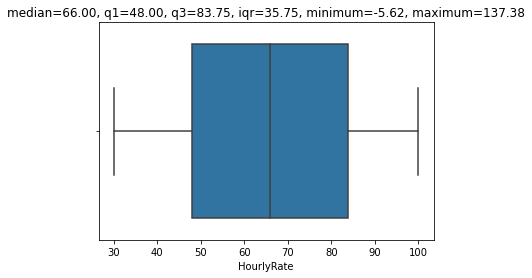

rows before removing: 1470
rows after removing: 1470


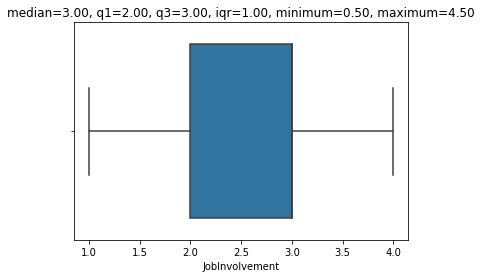

rows before removing: 1470
rows after removing: 1470


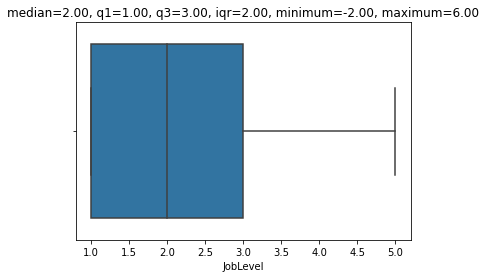

rows before removing: 1470
rows after removing: 1470


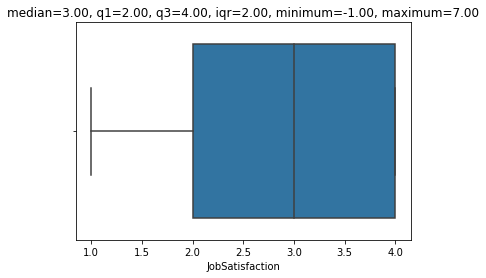

rows before removing: 1470
rows after removing: 1356


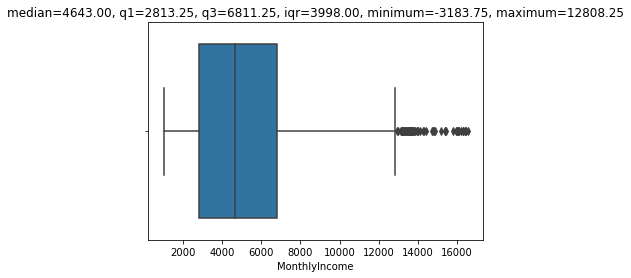

rows before removing: 1356
rows after removing: 1356


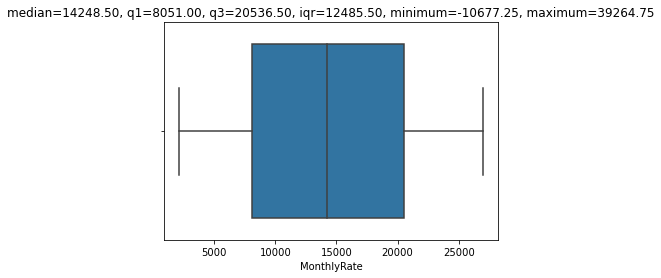

rows before removing: 1356
rows after removing: 1309


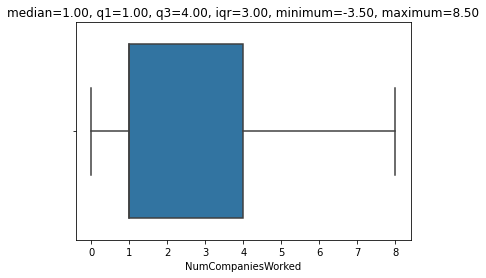

rows before removing: 1309
rows after removing: 1309


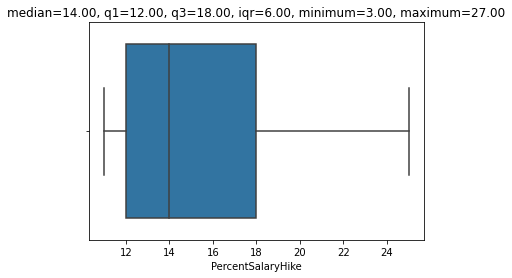

rows before removing: 1309
rows after removing: 1309


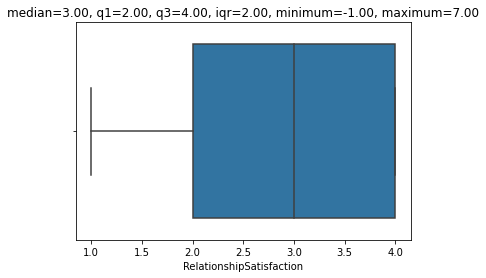

rows before removing: 1309
rows after removing: 1232


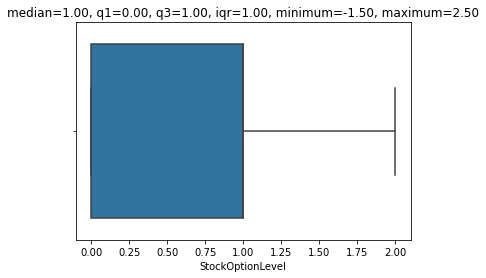

rows before removing: 1232
rows after removing: 1177


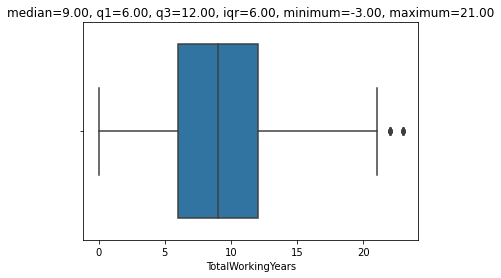

rows before removing: 1177
rows after removing: 977


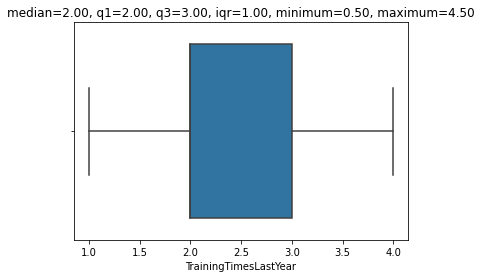

rows before removing: 977
rows after removing: 977


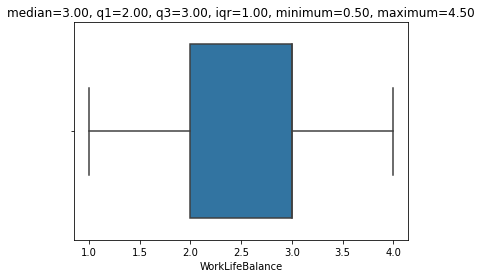

rows before removing: 977
rows after removing: 944


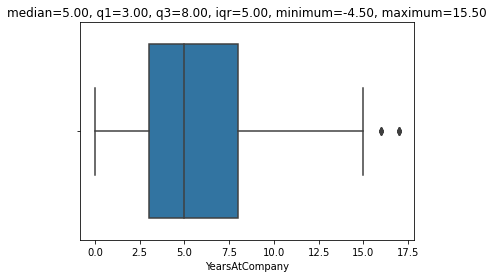

rows before removing: 944
rows after removing: 943


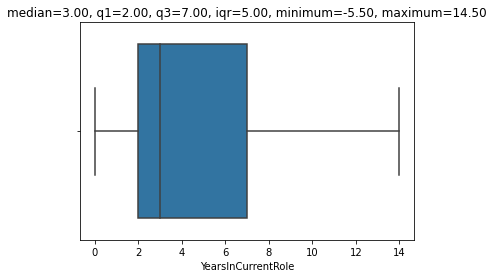

rows before removing: 943
rows after removing: 809


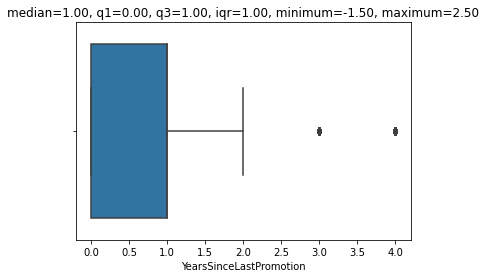

rows before removing: 809
rows after removing: 770


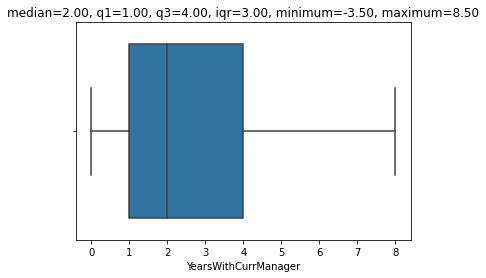

In [835]:
for col in df1.select_dtypes('int64').columns.difference(["PerformanceRating"]) :
    print(f"rows before removing: {df1.shape[0]}")
    df1 = remove_outliers(df1, col)
    print(f"rows after removing: {df1.shape[0]}")
    
    # Let's have a look at the end-result. Here is something very strange though, our data still appears to have outliers!
    box_and_whisker(df1, col)
    _, _, _, _, minimum_Col_after, maximum_Col_after = get_iqr_values(df1, col)

In [836]:
trainset, testset = train_test_split(df1,test_size = 0.25, random_state =12)

In [837]:
trainset['Attrition'].value_counts()

No     472
Yes    105
Name: Attrition, dtype: int64

In [838]:
testset['Attrition'].value_counts()

No     155
Yes     38
Name: Attrition, dtype: int64

In [839]:
def Encoding(DataFrame) :
    code = {'Yes':1, 'No' : 0}
    DataFrame.loc[:,'OverTime'] = DataFrame['OverTime'].map(code)
    DataFrame.loc[:,'Attrition'] = DataFrame['Attrition'].replace(code)
    DataFrame = pd.get_dummies(DataFrame)
    return DataFrame

In [840]:
def Pre_Processing(DataFrame) :
    DataFrame = Encoding(DataFrame)
    
    X = DataFrame.drop('Attrition', axis = 1)
    Y = DataFrame['Attrition']
   
    print(Y.value_counts())
    
    return X, Y

In [841]:
X_train, Y_train = Pre_Processing(trainset)

0    472
1    105
Name: Attrition, dtype: int64


C:\Users\nour\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [842]:
X_test, Y_test = Pre_Processing(testset)

0    155
1     38
Name: Attrition, dtype: int64


<AxesSubplot:>

<Figure size 1296x648 with 0 Axes>

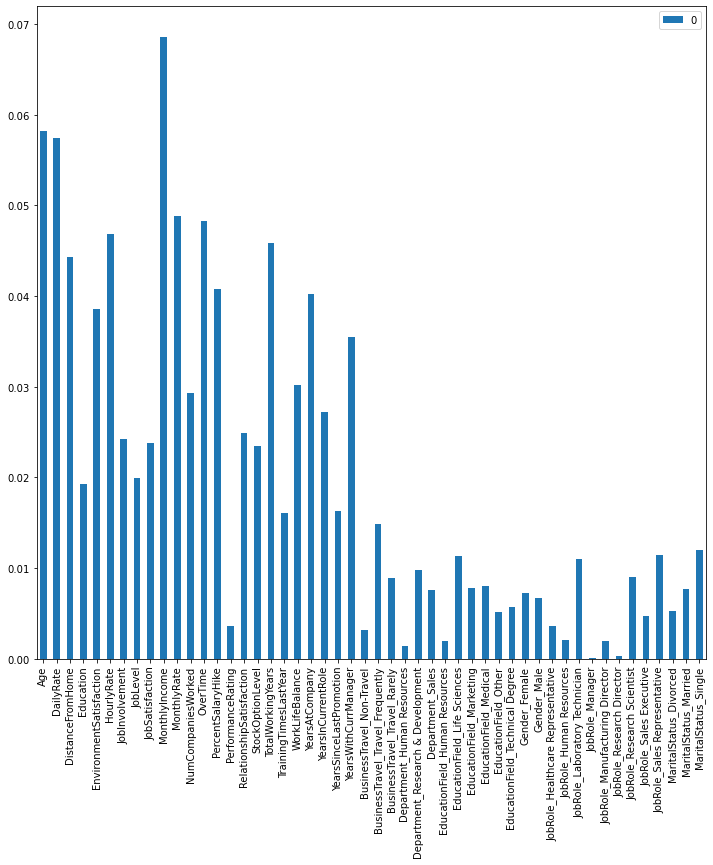

In [843]:
estimator = RandomForestClassifier().fit(X_train,Y_train)
plt.figure(figsize=(18,9))
Features = pd.DataFrame(estimator.feature_importances_, index = X_train.columns)
Features.plot.bar(figsize=(12,12))

In [844]:
rfecv = RFECV(estimator = RandomForestClassifier(),step = 1, cv = 5)
rfecv = rfecv.fit(X_train,Y_train)
X_train = rfecv.transform(X_train)
X_test = rfecv.transform(X_test)

### 2-Evaluation 

In [845]:
def Evaluation(model) : 
    model.fit(X_train, Y_train)
    accuracy_train = model.score(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    print('accuracy train score :', accuracy_train)
    print('Confusion Matrix : \n', confusion_matrix(Y_test, y_pred))
    print('Classification Report: \n', classification_report(Y_test, y_pred))
   
    N, train_score, val_score = learning_curve(model, X_train, Y_train,cv = 5, scoring = 'f1', train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize = (10,10))
    plt.plot(N, train_score.mean(axis = 1), label = 'train score')
    plt.plot(N, val_score.mean(axis = 1), label = 'validation score')
    plt.legend(loc='lower right')

accuracy train score : 1.0
Confusion Matrix : 
 [[152   3]
 [ 28  10]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.98      0.91       155
           1       0.77      0.26      0.39        38

    accuracy                           0.84       193
   macro avg       0.81      0.62      0.65       193
weighted avg       0.83      0.84      0.81       193



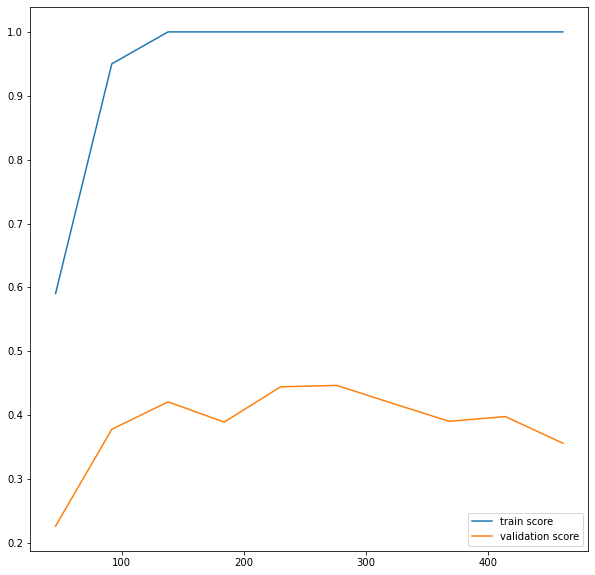

In [846]:
lgb = make_pipeline(StandardScaler(),LGBMClassifier())
Evaluation(lgb)

accuracy train score : 1.0
Confusion Matrix : 
 [[152   3]
 [ 35   3]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89       155
           1       0.50      0.08      0.14        38

    accuracy                           0.80       193
   macro avg       0.66      0.53      0.51       193
weighted avg       0.75      0.80      0.74       193



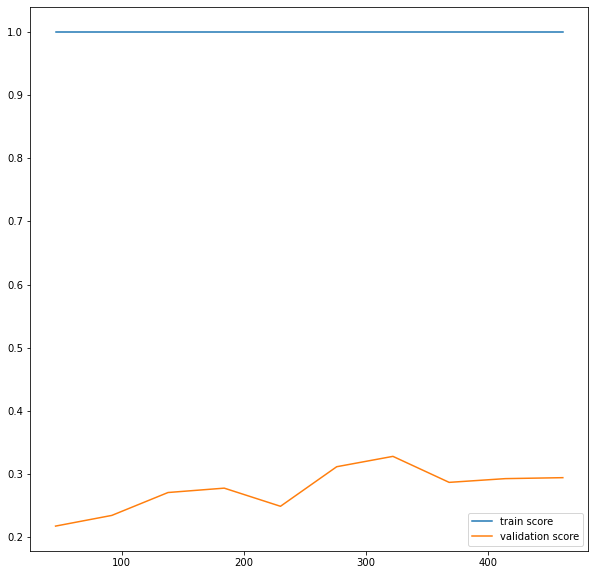

In [847]:
RF =RandomForestClassifier(random_state = 12)
Evaluation(RF)

accuracy train score : 0.8734835355285961
Confusion Matrix : 
 [[150   5]
 [ 35   3]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88       155
           1       0.38      0.08      0.13        38

    accuracy                           0.79       193
   macro avg       0.59      0.52      0.51       193
weighted avg       0.73      0.79      0.73       193



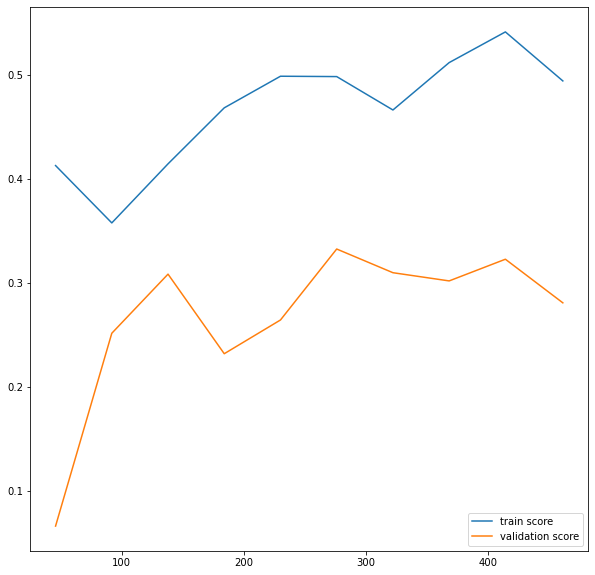

In [848]:
KNN = make_pipeline(StandardScaler(),KNeighborsClassifier())
Evaluation(KNN)

accuracy train score : 0.9046793760831889
Confusion Matrix : 
 [[150   5]
 [ 23  15]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.97      0.91       155
           1       0.75      0.39      0.52        38

    accuracy                           0.85       193
   macro avg       0.81      0.68      0.72       193
weighted avg       0.84      0.85      0.84       193



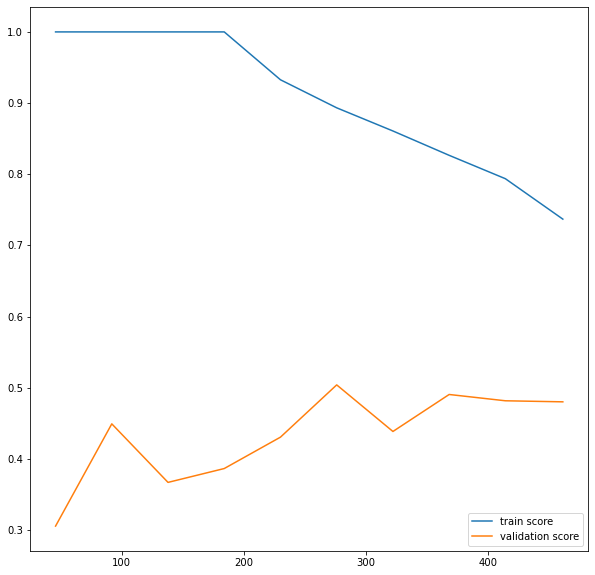

In [849]:
AdaBoost = AdaBoostClassifier(random_state=12)
Evaluation(AdaBoost)

accuracy train score : 0.8873483535528596
Confusion Matrix : 
 [[147   8]
 [ 24  14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       155
           1       0.64      0.37      0.47        38

    accuracy                           0.83       193
   macro avg       0.75      0.66      0.68       193
weighted avg       0.82      0.83      0.82       193



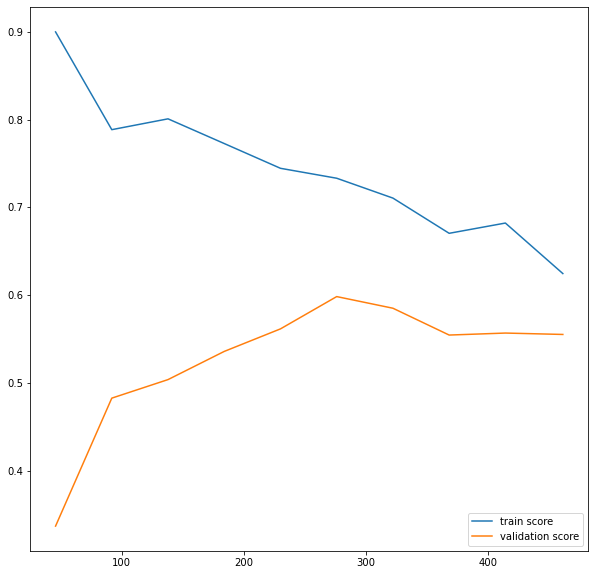

In [850]:
LR = make_pipeline(StandardScaler(), LogisticRegression(solver='liblinear', penalty='l1'))
Evaluation(LR)

accuracy train score : 0.9306759098786829
Confusion Matrix : 
 [[152   3]
 [ 33   5]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.98      0.89       155
           1       0.62      0.13      0.22        38

    accuracy                           0.81       193
   macro avg       0.72      0.56      0.56       193
weighted avg       0.78      0.81      0.76       193



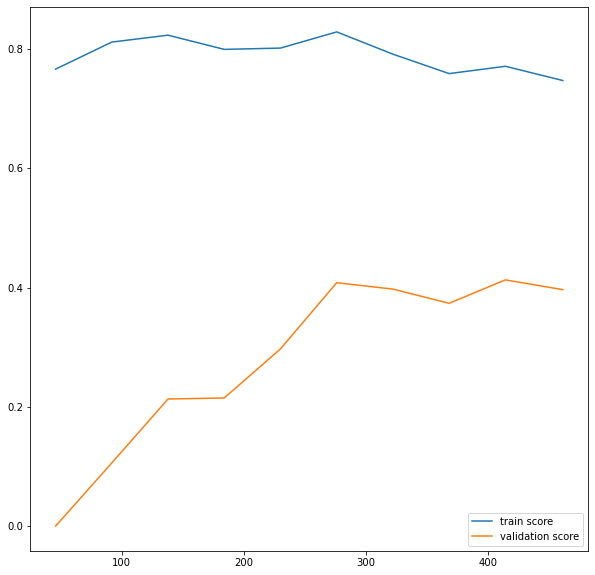

In [851]:
SVM = make_pipeline(StandardScaler(), SVC(random_state=12))
Evaluation(SVM)

In [852]:
model_scores={'LightGBM classifier' : lgb.score(X_test,Y_test),
              'Logistic Regression': LR.score(X_test,Y_test),
             'AdaBoost classifier': AdaBoost.score(X_test,Y_test),
             'KNN classifier':KNN.score(X_test,Y_test),
             'Support Vector Machine':SVM.score(X_test,Y_test),
             'Random forest':RF.score(X_test,Y_test),
             }
pd.DataFrame(model_scores,index=['accuracy'])

,LightGBM classifier,Logistic Regression,AdaBoost classifier,KNN classifier,Support Vector Machine,Random forest
accuracy,0.839378,0.834197,0.854922,0.792746,0.813472,0.803109


### 3-Optimization

In [853]:
SVM

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=12))])

In [854]:
params = {
    'svc__gamma':[1e-3, 1e-4, 0.0005],
    'svc__C':[1, 10, 100, 1000, 3000],
    'svc__kernel':['poly', 'linear','rbf']
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = RandomizedSearchCV(SVM,params ,cv = cv, scoring = 'accuracy')
grid.fit(X_train, Y_train)
print(grid.best_params_)
y_pred = grid.predict(X_test)
print(classification_report(Y_test, y_pred))

{'svc__kernel': 'rbf', 'svc__gamma': 0.0005, 'svc__C': 1000}
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       155
           1       0.61      0.29      0.39        38

    accuracy                           0.82       193
   macro avg       0.73      0.62      0.64       193
weighted avg       0.80      0.82      0.80       193



accuracy train score : 0.9150779896013865
Confusion Matrix : 
 [[148   7]
 [ 27  11]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       155
           1       0.61      0.29      0.39        38

    accuracy                           0.82       193
   macro avg       0.73      0.62      0.64       193
weighted avg       0.80      0.82      0.80       193



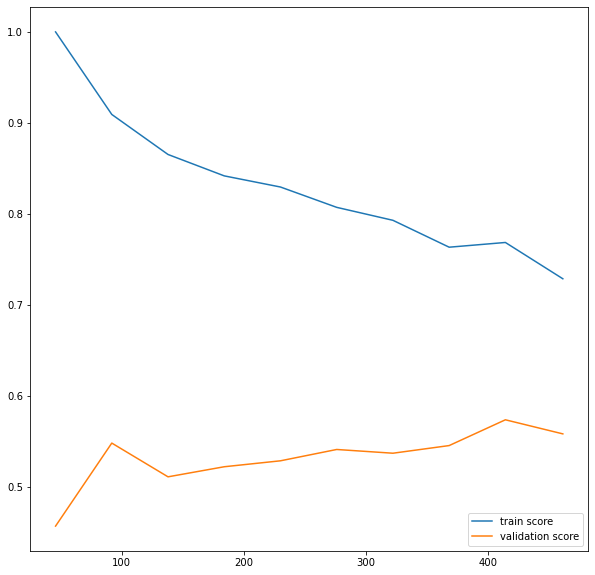

In [855]:
Evaluation(grid.best_estimator_)

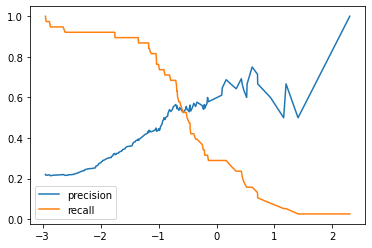

In [860]:
precision, recall, threshold = precision_recall_curve(Y_test, grid.best_estimator_.decision_function(X_test))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [861]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [881]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-0.7)

In [882]:
f1_score(Y_test, y_pred)

0.6024096385542169

In [883]:
accuracy_score(Y_test, y_pred)

0.8290155440414507